In [1]:
import pandas as pd

In [2]:
df_ss = pd.read_csv('sample_submission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_ss['target'].unique())
df_train.info()

[0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: 

In [5]:
# создаем функцию для предобработке данных

def month_to_digit(m):
    months_dict = {'mar':0, 'apr':1, 'may':2, 'jun':3, 'jul':4, 'aug':5, 'sep':6, 'oct':7, 'nov':8, 'dec':9}
    return months_dict[m]

def day_to_digit(d):
    days_dict = {'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4}
    return days_dict[d]

def prepare_data(df):
    
    df = df.drop(['_id'], axis=1) # Удаляем индивидуальный ID клиента

    df = df.drop(['target'], axis=1) # Удаляем индивидуальный ID клиента
    
    df['month'] = df['month'].map(lambda x: month_to_digit(x)) # Конвертируем названия месяцев в числа
    
    df['day_of_week'] = df['day_of_week'].map(lambda x: day_to_digit(x)) # Конвертируем дни недели в числа
    
    category_columns = [
        'job',
        'marital',
        'education',
        'default',
        'housing',
        'loan',
        'contact',
        'poutcome'
    ]
    
    df = pd.get_dummies(df, prefix=category_columns)
    
    
    
    return df
    
    

In [6]:
X = prepare_data(df_train)
y = df_train['target'].values

In [7]:
# Разделяем датасет на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Делаем Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
# Импортируем модели классификации

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_predict_proba = knn.predict_proba(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('KNeighborsClassifier metrics')
print('accuracy', accuracy_score(y_test, knn_predict))
print('precision', precision_score(y_test, knn_predict))
print('recall', recall_score(y_test, knn_predict))
print('')

print('DecisionTreeClassifier metrics')
print('accuracy', accuracy_score(y_test, dtc_predict))
print('precision', precision_score(y_test, dtc_predict))
print('recall', recall_score(y_test, dtc_predict))
print('')

print('LogisticRegression metrics')
print('accuracy', accuracy_score(y_test, lr_predict))
print('precision', precision_score(y_test, lr_predict))
print('recall', recall_score(y_test, lr_predict))
print('')

KNeighborsClassifier metrics
accuracy 0.899858385595792
precision 0.6273764258555133
recall 0.29359430604982206

DecisionTreeClassifier metrics
accuracy 0.8844831074246409
precision 0.4925619834710744
recall 0.5302491103202847

LogisticRegression metrics
accuracy 0.90977139389035
precision 0.6746987951807228
recall 0.398576512455516



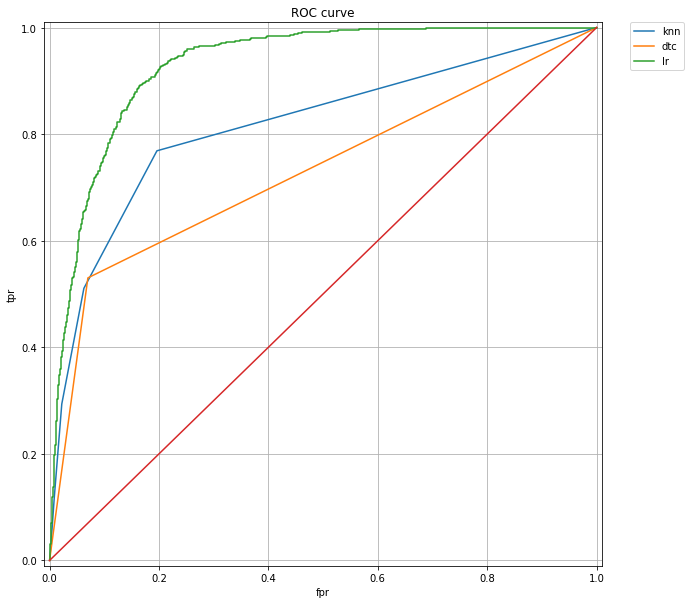

KNeighborsClassifier roc_auc: 0.635612491988618
DecisionTreeClassifier roc_auc: 0.7300868925260405
LogisticRegression roc_auc: 0.6869623032489861



In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_predict_proba[:,1])
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc_predict_proba[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_predict_proba[:,1])
plt.figure(figsize=(10, 10))

plt.plot(knn_fpr, knn_tpr, label='knn')
#plt.legend('dtc')

plt.plot(dtc_fpr, dtc_tpr, label='dtc')
#plt.legend('rfc')

plt.plot(lr_fpr, lr_tpr, label='lr')
#plt.legend('lr')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.show(y_test.shape)
plt.show(dtc_predict_proba.shape)

knn_roc_auc_score = roc_auc_score(y_test, knn_predict)
print('KNeighborsClassifier roc_auc: {}'.format(knn_roc_auc_score))

dtc_roc_auc_score = roc_auc_score(y_test, dtc_predict)
print('DecisionTreeClassifier roc_auc: {}'.format(dtc_roc_auc_score))

lr_roc_auc_score = roc_auc_score(y_test, lr_predict)
print('LogisticRegression roc_auc: {}'.format(lr_roc_auc_score))
print('')

In [17]:
# Делаем k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитаем средний roc_auc

from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

knn_cross_val_score = cross_val_score(
                            knn,
                            X,
                            y,
                            scoring='roc_auc',
                            cv=10
                        )

dtc_cross_val_score = cross_val_score(
                            dtc,
                            X,
                            y,
                            scoring='roc_auc',
                            cv=10
                        )

lr_cross_val_score = cross_val_score(
                            lr,
                            X,
                            y,
                            scoring='roc_auc',
                            cv=10
                        )
knn_mean_k_fold = knn_cross_val_score.mean()
print('KNeighborsClassifier k-fold:')
print(knn_cross_val_score)
print('KNeighborsClassifier mean k-fold: {}'.format(knn_mean_k_fold))
print('')

dtc_mean_k_fold = dtc_cross_val_score.mean()
print('DecisionTreeClassifier k-fold:')
print(dtc_cross_val_score)
print('DecisionTreeClassifier mean k-fold: {}'.format(dtc_mean_k_fold))
print('')

lr_mean_k_fold = lr_cross_val_score.mean()
print('LogisticRegression k-fold:')
print(lr_cross_val_score)
print('LogisticRegression mean k-fold: {}'.format(lr_mean_k_fold))
print('')

KNeighborsClassifier k-fold:
[0.87117122 0.87204889 0.86169582 0.87018323 0.88201626 0.86456862
 0.86397506 0.87137252 0.85894341 0.87134052]
KNeighborsClassifier mean k-fold: 0.8687315549100564

DecisionTreeClassifier k-fold:
[0.75768697 0.74165355 0.72663264 0.71809619 0.73370549 0.74320435
 0.74190115 0.72976947 0.72323327 0.70836232]
DecisionTreeClassifier mean k-fold: 0.7324245403701648

LogisticRegression k-fold:
[0.918764   0.91329041 0.92560558 0.931831   0.91918241 0.90971078
 0.93866913 0.92889119 0.91754024 0.92573058]
LogisticRegression mean k-fold: 0.9229215327249382

